In [34]:
import re
import matplotlib.pyplot as plt
import torch

In [35]:
def extract_float(file_name, start="Epoch"):
  def isfloat(word):
    try:
      float(word)
      return True
    except ValueError:
      return False
  file = open(file_name)
  l = [[float(word) for word in re.split("\n|,| |\t|\(|\)|\[|\]", line) if isfloat(word)] for line in file if line.startswith(start)]
  return torch.tensor(l)

def find_mean_index(data):
  '''
  data shape: [batch size, number of logged metrics]
    the first metric logged must be epoch number
  
  return: list of index indicating mean loss positions
  '''
  last_epoch_num = 0
  indice = []
  for i, e in enumerate(data[:, 0]):
    if e != last_epoch_num:
      indice.append(i-1)
      last_epoch_num = e
  indice.append(i)
  return indice

def show_plot(all_file_names, line_labels, graph_name="", train_index=6, val_index=8, cap=None, start="Epoch", cut=1000, lowercut=0):
  cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
  # fig, axarr = plt.subplots(1, 2, figsize=(15, 4))
  fig, axarr = plt.subplots(1, 2, figsize=(15, 5))

  for i, file_names in enumerate(all_file_names):
    print("plotting cluster {}".format(i))
    data = []
    for file_name in file_names:
        d = extract_float(file_name, start)
        if cap:
            data.append(d.unsqueeze(0)[:, find_mean_index(d)].clip(0, cap))
        else:
            data.append(d.unsqueeze(0)[:, find_mean_index(d)])
        print(f"{re.split('/|_', file_name)[4]}, min train loss: {data[-1].min(dim=1)[0][0, train_index]}, min val loss: {data[-1].min(dim=1)[0][0, val_index]}")

    data = torch.cat(data)[:, lowercut:cut]

    mean_data = data[:, :, train_index].mean(dim=0)
    axarr[0].plot(list(range(lowercut, lowercut + data.shape[1])), mean_data, label=line_labels[i], color=cs[i])
    if data.shape[0] != 1:
        var_data = data[:, :, train_index].std(dim=0)
        axarr[0].fill_between(list(range(lowercut, lowercut + data.shape[1])), mean_data - var_data, mean_data + var_data, alpha=0.2, color=cs[i])
    axarr[0].legend()
    axarr[0].set_title(graph_name + " training curve")
    axarr[0].set(xlabel='Epoch', ylabel='Loss')

    mean_data = data[:, :, val_index].mean(dim=0)
    axarr[1].plot(list(range(lowercut, lowercut + data.shape[1])), mean_data, label=line_labels[i], color=cs[i])
    if data.shape[0] != 1:
        var_data = data[:, :, val_index].std(dim=0)
        axarr[1].fill_between(list(range(lowercut, lowercut + data.shape[1])), mean_data - var_data, mean_data + var_data, alpha=0.2, color=cs[i])
    axarr[1].legend()
    axarr[1].set_title(graph_name + " validation curve")
    axarr[1].set(xlabel='Epoch', ylabel='Loss')

  return fig, axarr


plotting cluster 0
shuffledFalse, min train loss: 0.3449397683143616, min val loss: 0.36695754528045654
shuffledFalse, min train loss: 0.36041712760925293, min val loss: 0.3629476726055145
torch.Size([2, 20, 6])
plotting cluster 1
shuffledFalse, min train loss: 0.36168959736824036, min val loss: 0.38117966055870056
shuffledFalse, min train loss: 0.39739716053009033, min val loss: 0.42217496037483215
shuffledFalse, min train loss: 0.3599087595939636, min val loss: 0.369910329580307
shuffledFalse, min train loss: 0.37353917956352234, min val loss: 0.43083655834198
torch.Size([4, 20, 6])
plotting cluster 2
shuffledFalse, min train loss: 0.2640118896961212, min val loss: 0.28240394592285156
shuffledFalse, min train loss: 0.27909839153289795, min val loss: 0.28725746273994446
torch.Size([2, 40, 6])
plotting cluster 3
shuffledFalse, min train loss: 0.27783775329589844, min val loss: 0.30185237526893616
torch.Size([1, 40, 6])
plotting cluster 4
shuffledFalse, min train loss: 0.328574061393737

(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'supervised pretrain set training curve'}, xlabel='Epoch', ylabel='Loss'>,
        <AxesSubplot:title={'center':'supervised pretrain set validation curve'}, xlabel='Epoch', ylabel='Loss'>],
       dtype=object))

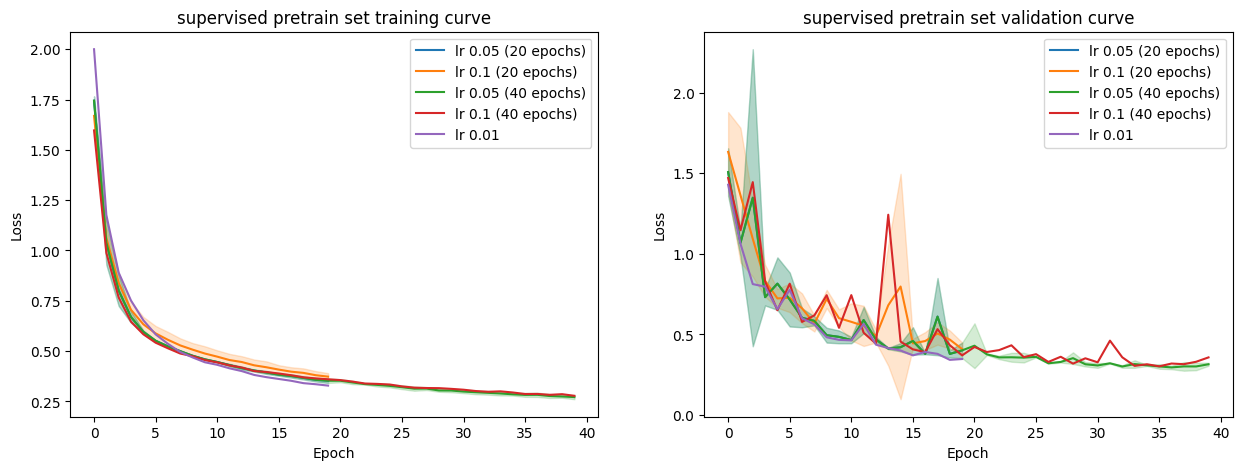

In [26]:
all_file_names = []
all_file_names.append([
    "./supervised/73656_epoch20_shuffledFalse_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
    './supervised/73907_epoch20_shuffledFalse_load_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt',
])
all_file_names.append([
    './supervised/74251_epoch20_shuffledFalse_load_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt',
    './supervised/74250_epoch20_shuffledFalse_load_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt',
    './supervised/73657_epoch20_shuffledFalse_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt',
    './supervised/73929_epoch20_shuffledFalse_load_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt'
])
all_file_names.append([
    "./supervised/73909_epoch20_shuffledFalse_load73656_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
    "./supervised/77553_epoch20_shuffledFalse_load73907_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
])
all_file_names.append([
    "./supervised/73928_epoch20_shuffledFalse_load73657_lr0.1-0.1_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
])
all_file_names.append([
    "./supervised/77552_epoch20_shuffledFalse_load_lr0.01-0.01_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
])
# all_file_names.append([
#     "./supervised/77553_epoch20_shuffledFalse_load73907_lr0.05-0.05_linear_on-pretrainTrue_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
# ])

labels = [
    'lr 0.05 (20 epochs)', 
    'lr 0.1 (20 epochs)', 
    'lr 0.05 (40 epochs)',
    'lr 0.1 (40 epochs)',
    "lr 0.01",
    ]
show_plot(all_file_names, labels, "supervised pretrain set", train_index=3, val_index=4, cap=2)

plotting cluster 0
shuffledFalse, min train loss: 0.28239205479621887, min val loss: 0.3757545053958893
plotting cluster 1
shuffledFalse, min train loss: 0.3137606382369995, min val loss: 0.42900148034095764
plotting cluster 2
shuffledFalse, min train loss: 0.14042752981185913, min val loss: 0.324514240026474
plotting cluster 3
shuffledFalse, min train loss: 0.14448848366737366, min val loss: 0.31603938341140747
shuffledFalse, min train loss: 0.14042752981185913, min val loss: 0.324514240026474


(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'supervised dev dataset training curve'}, xlabel='Epoch', ylabel='Loss'>,
        <AxesSubplot:title={'center':'supervised dev dataset validation curve'}, xlabel='Epoch', ylabel='Loss'>],
       dtype=object))

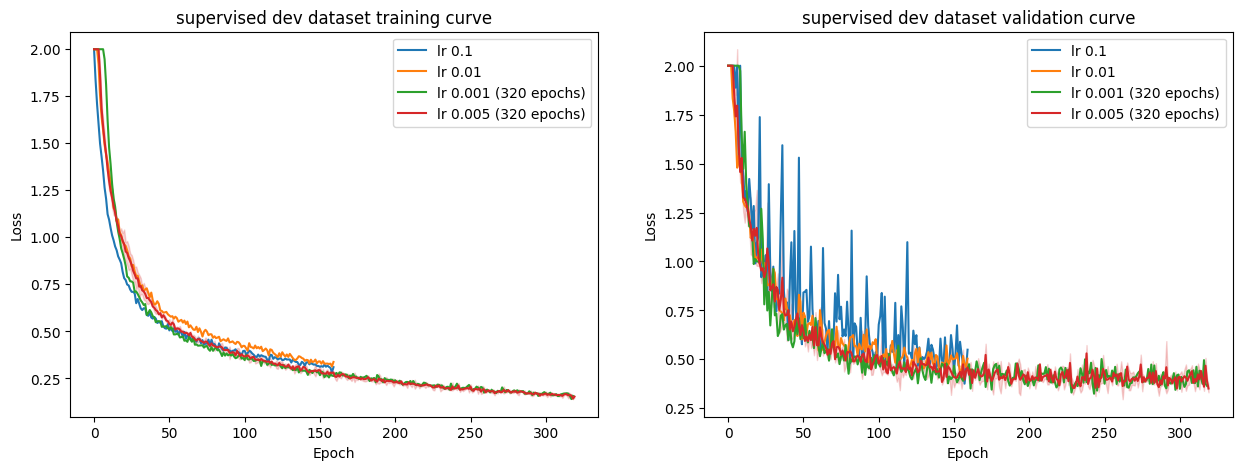

In [44]:
all_file_names = []
all_file_names.append([
    "./supervised/74006_epoch160_shuffledFalse_load_lr0.1-0.1_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt", 
    # "./supervised/74014_epoch160_shuffledFalse_load_lr0.1-0.1_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt", 
])
all_file_names.append([
    './supervised/74198_epoch160_shuffledFalse_load_lr0.01-0.01_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt',
    # "./supervised/74650_epoch160_shuffledFalse_load_lr0.01-0.01_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
    # "./supervised/74649_epoch160_shuffledFalse_load_lr0.01-0.01_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt"
])
# all_file_names.append([
#     "./supervised/74069_epoch160_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
#     "./supervised/74197_epoch160_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
#     "./supervised/74068_epoch160_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt"
# ])
all_file_names.append([
    "./supervised/74722_epoch160_shuffledFalse_load_lr0.001-0.001_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
    # "./supervised/74723_epoch160_shuffledFalse_load_lr0.001-0.001_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
])
all_file_names.append([
    "./supervised/75113_epoch320_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
    "./supervised/75114_epoch320_shuffledFalse_load_lr0.005-0.005_linear_on-pretrainFalse_aug-colourTrue_optimizerAdam_naive-resnetFalse.txt",
])

labels = ['lr 0.1', 'lr 0.01', 'lr 0.001 (320 epochs)', 'lr 0.005 (320 epochs)']
show_plot(all_file_names, labels, "supervised dev dataset", train_index=3, val_index=4, cap=2)


plotting cluster 0
shuffledFalse, min train loss: 6.560699939727783, min val loss: 6.445700168609619
plotting cluster 1
shuffledFalse, min train loss: 6.5096001625061035, min val loss: 6.434999942779541
supervisedFalse, min train loss: 6.400400161743164, min val loss: 6.330599784851074
supervisedFalse, min train loss: 6.378200054168701, min val loss: 6.287600040435791
supervisedFalse, min train loss: 6.310299873352051, min val loss: 6.234499931335449
plotting cluster 2
supervisedFalse, min train loss: 6.400400161743164, min val loss: 6.330599784851074
plotting cluster 3
early-stopTrue, min train loss: 6.276400089263916, min val loss: 6.2164998054504395
plotting cluster 4
early-stopFalse, min train loss: 7.328100204467773, min val loss: 6.456699848175049


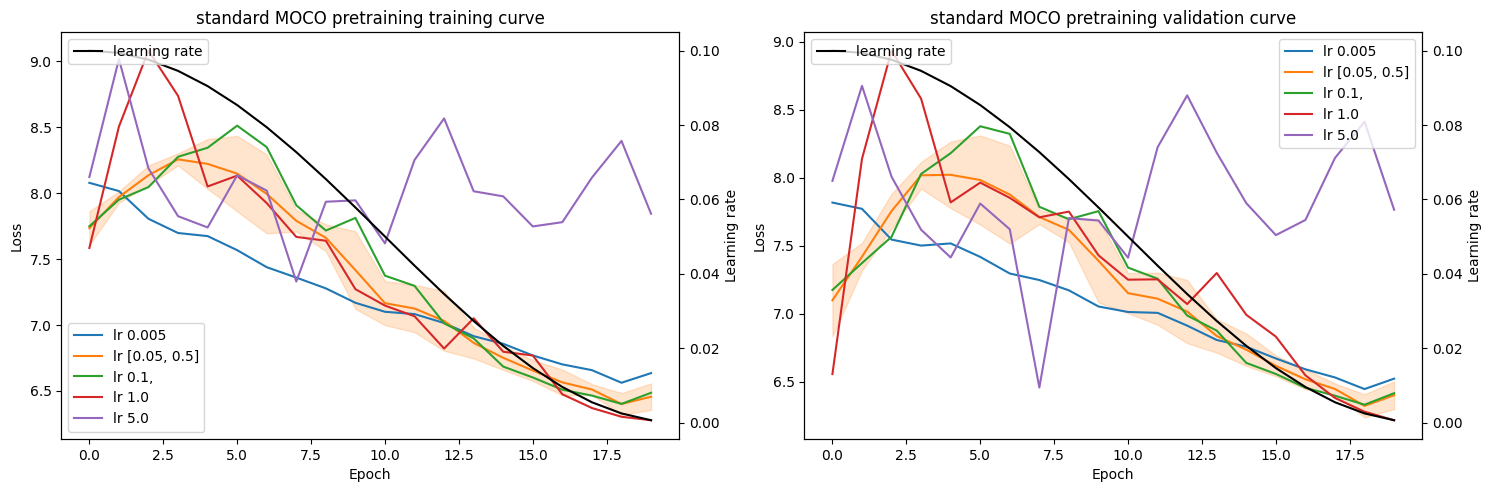

In [5]:
all_file_names = []
all_file_names.append([
   "./moco/74240_epochs20_shuffledFalse_load_lr-pretrain0.005-0.005-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
# all_file_names.append([
#    "./moco/74496_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
# ])
# all_file_names.append([
#     "./moco/74003_epochs20_shuffledFalse_load_lr-pretrain0.03-0.03-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
#     "./moco/73802_epochs20_shuffledFalse_lr-pretrain0.03-0.03-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
#     "./moco/73860_epochs20_shuffledFalse_load_lr-pretrain0.03-0.03-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
#     "./moco/74004_epochs20_shuffledFalse_load_lr-pretrain0.03-0.03-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
# ])
all_file_names.append([
   "./moco/74207_epochs20_shuffledFalse_load_lr-pretrain0.05-0.05-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
   "./moco/74529_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
   "./moco/75453_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
   "./moco/74610_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.5-0.5-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
all_file_names.append([
   "./moco/74529_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
  #  "./moco/75453_epochs20_supervisedFalse_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
all_file_names.append([
  #  "./moco/75797_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load_lr-pretrain1.0-1.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
   "./moco/75846_epochs20_early-stopTrue_supervisedFalse_shuffledFalse_load_lr-pretrain1.0-1.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./moco/75842_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load_lr-pretrain5.0-5.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])


labels = [
    "lr 0.005", 
    # "0.01", 
    # "0.03",
    "lr [0.05, 0.5]",
    "lr 0.1,",
    # "0.75", 
    "lr 1.0",
    "lr 5.0",
    ]
fig, axarr = show_plot(all_file_names, labels, "standard MOCO pretraining")

import math
lrs = [0.1 * 0.5 * (1. + math.cos(math.pi * epoch / 20)) for epoch in range(20)]
axarr[0] = axarr[0].twinx()
axarr[0].plot(lrs, color="black", label="learning rate")
axarr[0].legend(loc="upper left")
axarr[0].set_ylabel("Learning rate")

axarr[1] = axarr[1].twinx()
axarr[1].plot(lrs, color="black", label="learning rate")
axarr[1].legend(loc="upper left")
axarr[1].set_ylabel("Learning rate")

fig.tight_layout(pad=1.0)



plotting cluster 0
early-stopFalse, min train loss: 2.358799934387207, min val loss: 2.4388999938964844
early-stopFalse, min train loss: 2.2936627864837646, min val loss: 2.335836887359619
plotting cluster 1
early-stopTrue, min train loss: 5.008800029754639, min val loss: 4.934199810028076
early-stopFalse, min train loss: 4.990200042724609, min val loss: 4.927199840545654


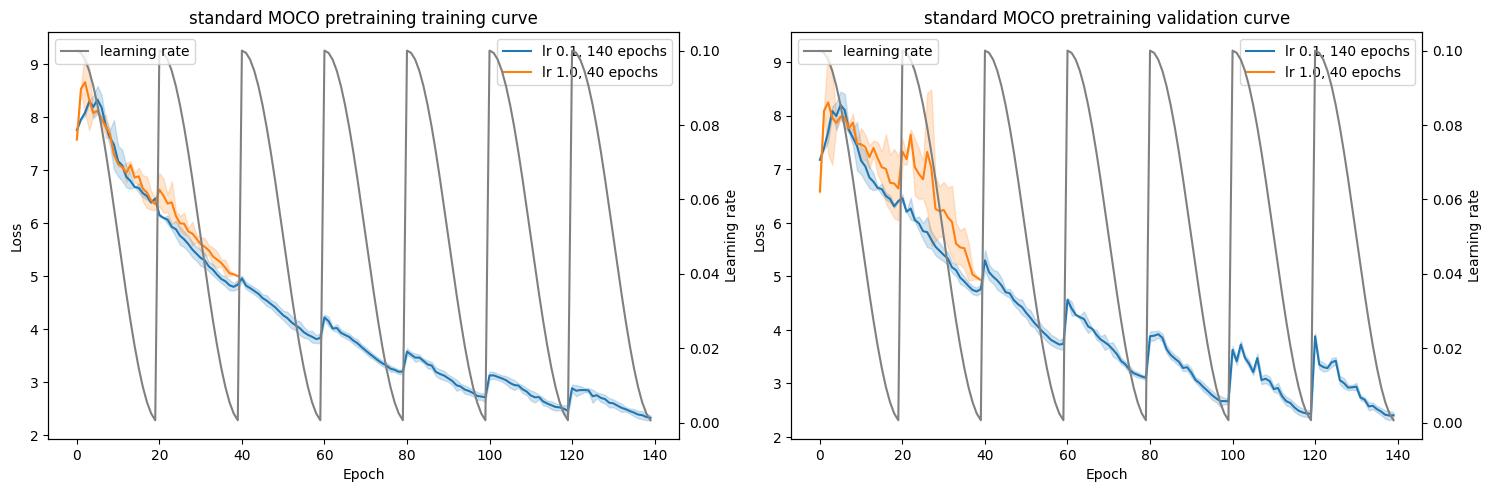

In [38]:
all_file_names = []
# all_file_names.append([
#    "./moco/75319_epochs20_supervisedFalse_shuffledFalse_load75297_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
#    "./moco/75696_epochs20_early-stopTrue_supervisedFalse_shuffledFalse_load75610_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
# ])
# all_file_names.append([
#    "./moco/76227_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75696_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
   "./moco/76513_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])

all_file_names.append([
   "./moco/75932_epochs40_early-stopTrue_supervisedFalse_shuffledFalse_load_lr-pretrain1.0-1.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
   "./moco/76125_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75846_lr-pretrain1.0-1.0-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])

labels = [
    # "lr 0.1, 80 epochs",
    # "lr 0.1, 100 epochs",
    "lr 0.1, 140 epochs",
    "lr 1.0, 40 epochs"
    ]
fig, axarr = show_plot(all_file_names, labels, "standard MOCO pretraining")

import math
lrs = [0.1 * 0.5 * (1. + math.cos(math.pi * epoch / 20)) for epoch in range(20)] * 7
axarr[0] = axarr[0].twinx()
axarr[0].plot(lrs, color="gray", label="learning rate")
axarr[0].legend(loc="upper left")
axarr[0].set_ylabel("Learning rate")

axarr[1] = axarr[1].twinx()
axarr[1].plot(lrs, color="gray", label="learning rate")
axarr[1].legend(loc="upper left")
axarr[1].set_ylabel("Learning rate")

fig.tight_layout(pad=1.0)



plotting cluster 0
plotting cluster 1
plotting cluster 2
plotting cluster 3
plotting cluster 4


(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'naive moco pretraining training curve'}, xlabel='Epoch', ylabel='Loss'>,
        <AxesSubplot:title={'center':'naive moco pretraining validation curve'}, xlabel='Epoch', ylabel='Loss'>],
       dtype=object))

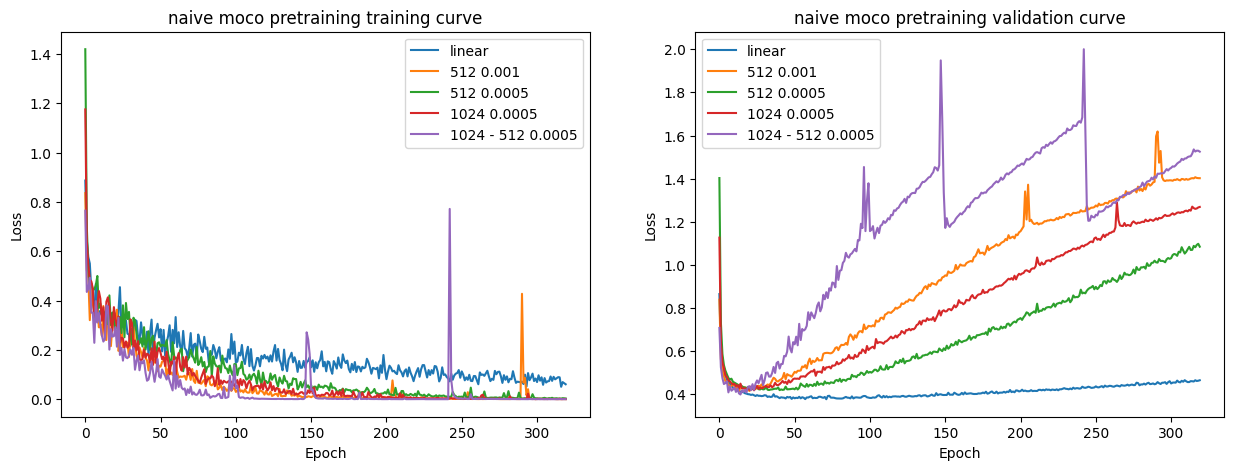

In [128]:
all_file_names = []
all_file_names.append([
   "./moco/76305_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76227_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
# all_file_names.append([
#    "./moco/76508_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
# all_file_names.append([
#    "./moco/76510_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
   "./moco/76512_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.001_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
   "./moco/76592_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.0005_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
   "./moco/76593_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.0005_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
   "./moco/76594_epochs0_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.0005_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])

labels = ["linear", "512 0.001", "512 0.0005", "1024 0.0005", "1024 - 512 0.0005"]
show_plot(all_file_names, labels, "naive moco pretraining", start="classification loss: dev_train_loader", train_index=2, val_index=3, cap=2)


plotting cluster 0
plotting cluster 1
plotting cluster 2


(<Figure size 1500x500 with 2 Axes>,
 array([<AxesSubplot:title={'center':'supervised moco sgd pretraining training curve'}, xlabel='Epoch', ylabel='Loss'>,
        <AxesSubplot:title={'center':'supervised moco sgd pretraining validation curve'}, xlabel='Epoch', ylabel='Loss'>],
       dtype=object))

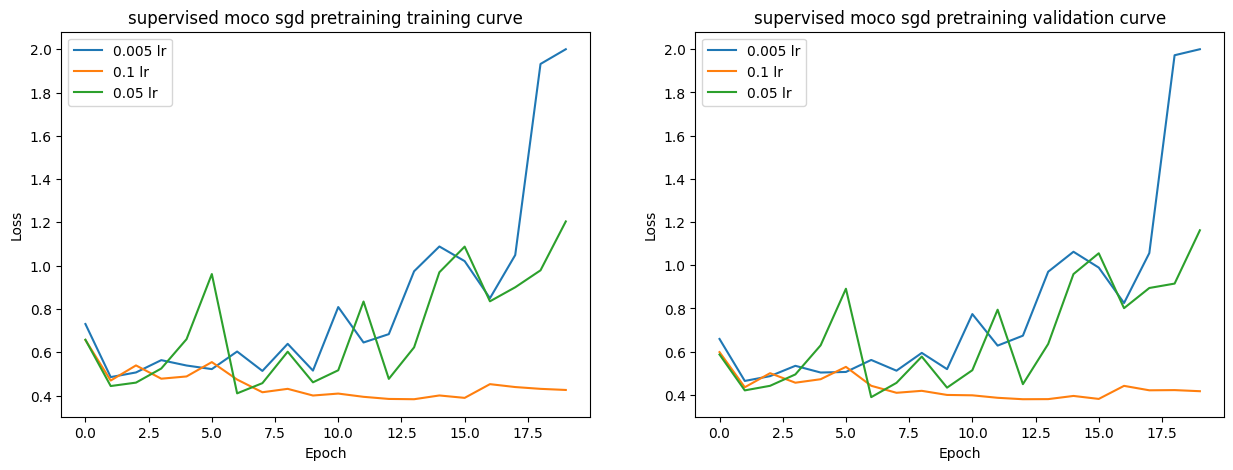

In [75]:
all_file_names = []
all_file_names.append([
   "./moco/74388_epochs20_shuffledFalse_load_lr-pretrain0.005-0.005-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
all_file_names.append([
    "./moco/74428_epochs20_shuffledFalse_supervisedTrue_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./moco/74918_epochs20_supervisedTrue_shuffledFalse_load_lr-pretrain0.05-0.05-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])

labels = ["0.005 lr", "0.1 lr", "0.05 lr"]
show_plot(all_file_names, labels, "supervised moco sgd pretraining", cap=2)

plotting cluster 0
early-stopFalse, min train loss: 0.21735000610351562, min val loss: 0.2107899934053421
plotting cluster 1
shuffledFalse, min train loss: 0.21320000290870667, min val loss: 0.20782999694347382
plotting cluster 2
shuffledFalse, min train loss: 0.20159000158309937, min val loss: 0.19183999300003052
plotting cluster 3
supervisedTrue, min train loss: 0.21133999526500702, min val loss: 0.2048500031232834


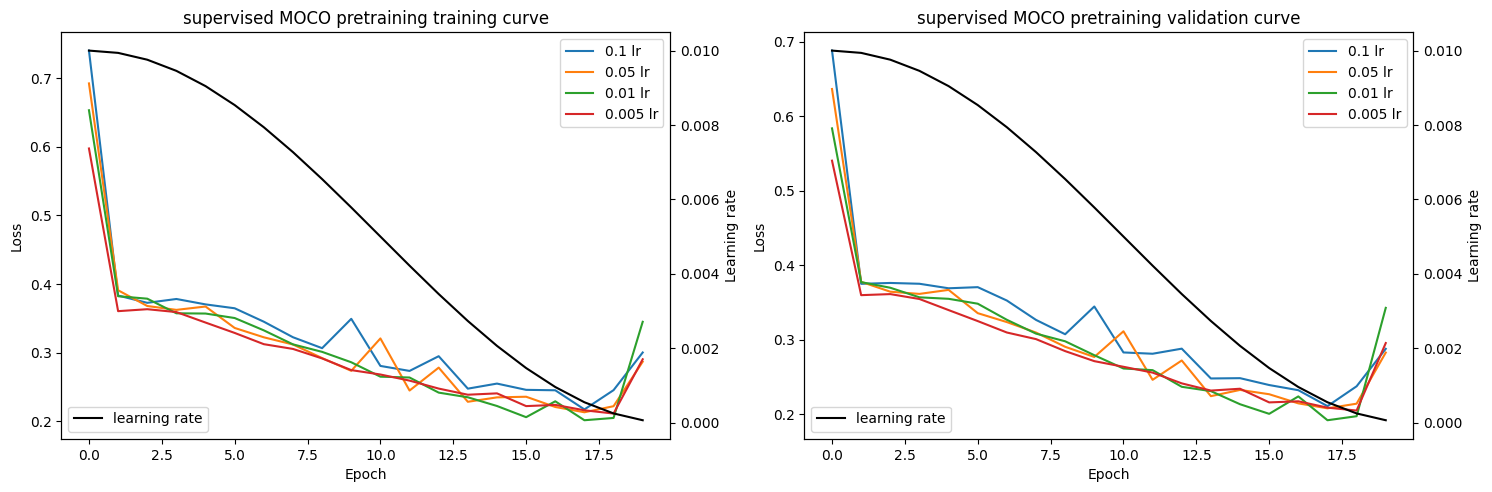

In [45]:
all_file_names = []
all_file_names.append([
    "./moco/77583_epochs20_early-stopFalse_supervisedTrue_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
   "./moco/74458_epochs20_shuffledFalse_supervisedTrue_load_lr-pretrain0.05-0.05-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt",
])
all_file_names.append([
    "./moco/74387_epochs20_shuffledFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./moco/74586_epochs20_supervisedTrue_shuffledFalse_load_lr-pretrain0.005-0.005-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
# all_file_names.append([
#     "./moco/77551_epochs20_early-stopFalse_supervisedTrue_shuffledFalse_load_lr-pretrain0.0001-0.0001-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])

labels = ["0.1 lr", "0.05 lr", "0.01 lr", "0.005 lr", ]
fig, axarr = show_plot(all_file_names, labels, "supervised MOCO pretraining", cap=2)

import math
lrs = [0.01 * 0.5 * (1. + math.cos(math.pi * epoch / 20)) for epoch in range(20)]
axarr[0] = axarr[0].twinx()
axarr[0].plot(lrs, color="black", label="learning rate")
axarr[0].legend(loc="lower left")
axarr[0].set_ylabel("Learning rate")

axarr[1] = axarr[1].twinx()
axarr[1].plot(lrs, color="black", label="learning rate")
axarr[1].legend(loc="lower left")
axarr[1].set_ylabel("Learning rate")

fig.tight_layout(pad=1.0)



plotting cluster 0
early-stopFalse, min train loss: 0.11333999782800674, min val loss: 0.11997000128030777
early-stopFalse, min train loss: 0.0939459279179573, min val loss: 0.10792944580316544


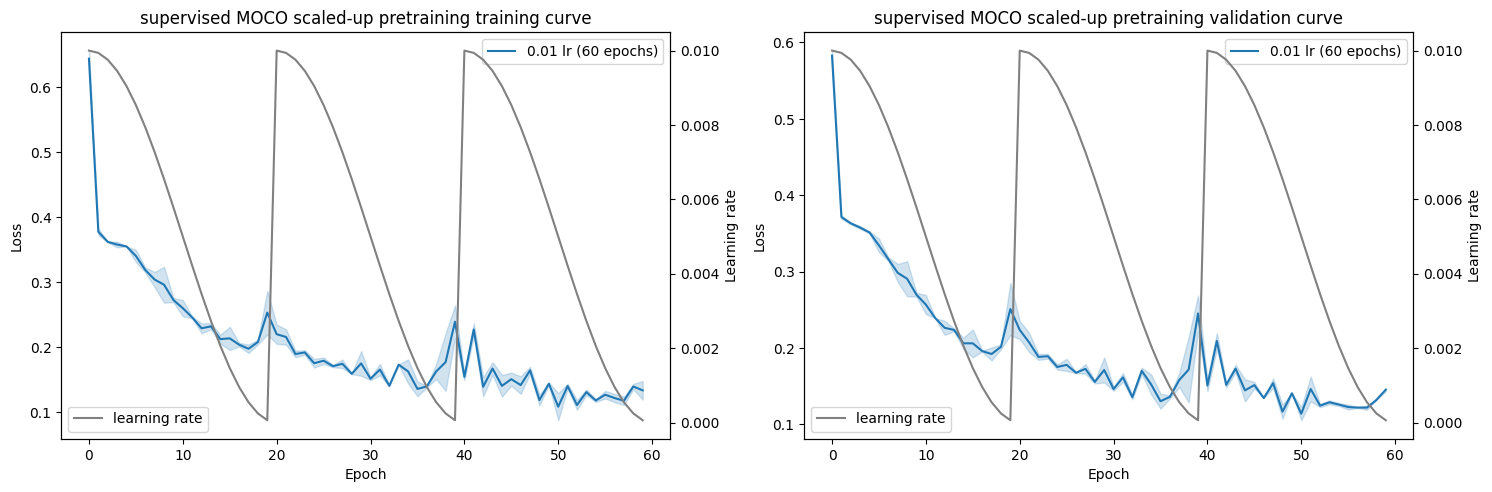

In [59]:
all_file_names = []
# all_file_names.append([
#     "./moco/75349_epochs20_supervisedTrue_shuffledFalse_load75046_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt",
#     "./moco/75767_epochs20_early-stopFalse_supervisedTrue_shuffledFalse_load75755_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
    "./moco/75890_epochs20_early-stopFalse_supervisedTrue_shuffledFalse_load75767_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt",
])

labels = [
    "0.01 lr (60 epochs)"
    ]
fig, axarr = show_plot(all_file_names, labels, "supervised MOCO scaled-up pretraining", cap=2)

import math
lrs = [0.01 * 0.5 * (1. + math.cos(math.pi * epoch / 20)) for epoch in range(20)] * 3
axarr[0] = axarr[0].twinx()
axarr[0].plot(lrs, color="gray", label="learning rate")
axarr[0].legend(loc="lower left")
axarr[0].set_ylabel("Learning rate")

axarr[1] = axarr[1].twinx()
axarr[1].plot(lrs, color="gray", label="learning rate")
axarr[1].legend(loc="lower left")
axarr[1].set_ylabel("Learning rate")

fig.tight_layout(pad=1.0)



plotting cluster 0
early-stopFalse, min train loss: 0.35559526085853577, min val loss: 0.2558489739894867
plotting cluster 1
shuffledFalse, min train loss: 0.35642901062965393, min val loss: 0.2520202696323395
plotting cluster 2
shuffledFalse, min train loss: 0.34174153208732605, min val loss: 0.244146466255188
plotting cluster 3
supervisedTrue, min train loss: 0.4432297348976135, min val loss: 0.2779228687286377


(<Figure size 1500x400 with 2 Axes>,
 array([<AxesSubplot:title={'center':'supervised MOCO mlp training curve'}, xlabel='Epoch', ylabel='Loss'>,
        <AxesSubplot:title={'center':'supervised MOCO mlp validation curve'}, xlabel='Epoch', ylabel='Loss'>],
       dtype=object))

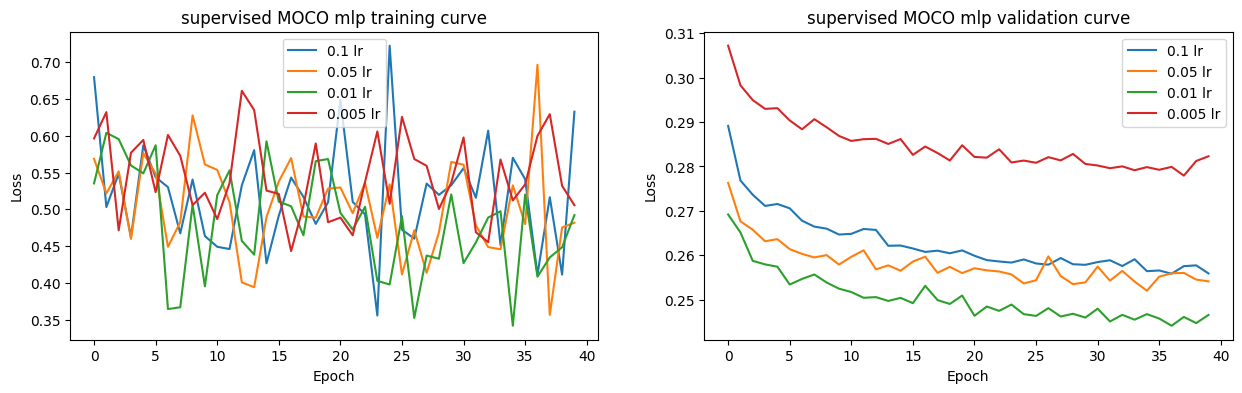

In [49]:
all_file_names = []
all_file_names.append([
    "./moco/77583_epochs20_early-stopFalse_supervisedTrue_shuffledFalse_load_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
   "./moco/74458_epochs20_shuffledFalse_supervisedTrue_load_lr-pretrain0.05-0.05-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt",
])
all_file_names.append([
    "./moco/74387_epochs20_shuffledFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./moco/74586_epochs20_supervisedTrue_shuffledFalse_load_lr-pretrain0.005-0.005-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])

labels = ["0.1 lr", "0.05 lr", "0.01 lr", "0.005 lr"]
show_plot(all_file_names, labels, "supervised MOCO mlp", start="classification loss: pretrain_loader", train_index=2, val_index=3)


plotting cluster 0
early-stopFalse, min train loss: 2.5304999351501465, min val loss: 2.482300043106079
plotting cluster 1
78144, min train loss: 3.868299961090088, min val loss: 3.7813000679016113
plotting cluster 2
76849, min train loss: 3.325200080871582, min val loss: 3.242799997329712
plotting cluster 3
76850, min train loss: 4.5680999755859375, min val loss: 4.476500034332275


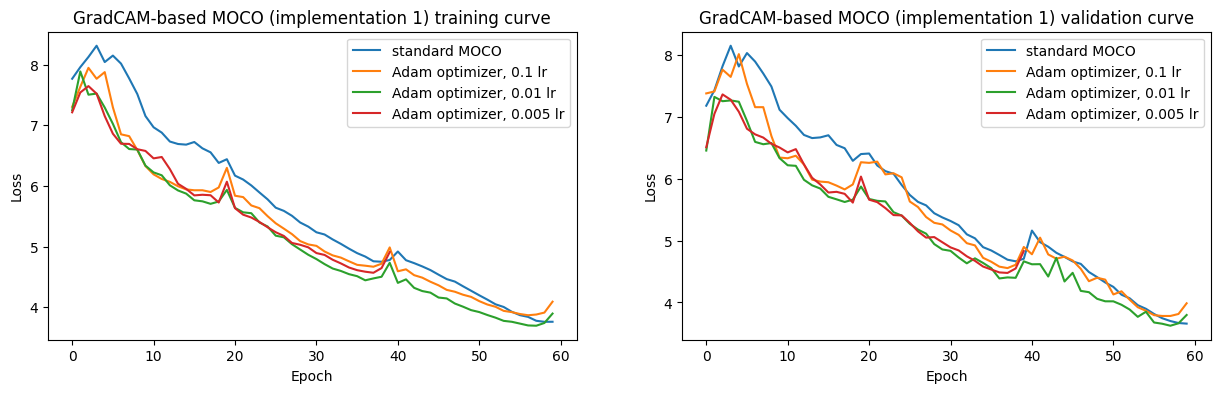

In [51]:
all_file_names = []
# all_file_names.append([
#    "./moco/76227_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75696_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
   "./moco/76305_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76227_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])

# all_file_names.append([
#     "./gradcam_perturb_moco/77128_epochs20_early-stopFalse_neg-lossFalse_load76780_lr-pretrain0.005-0.005-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/78144_epochs20_early-stopFalse_neg-lossFalse_load77186_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/78012_epochs20_early-stopFalse_neg-lossFalse_load76994_lr-pretrain0.05-0.05-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/76850_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76384_lr-pretrain0.005-0.005-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])

labels = [
    "standard MOCO",
    # "Adam optimizer, 60 epoch 0.01 lr + 20 epoch 0.005 lr",
    "Adam optimizer, 0.1 lr",
    # "Adam optimizer, 0.05 lr",
    "Adam optimizer, 0.01 lr",
    "Adam optimizer, 0.005 lr",
    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 1)", cut=60)



plotting cluster 0
early-stopFalse, min train loss: 2.5304999351501465, min val loss: 2.482300043106079
plotting cluster 1
77436, min train loss: 5.704100131988525, min val loss: 5.622700214385986
plotting cluster 2
77134, min train loss: 3.4068000316619873, min val loss: 3.31469988822937
plotting cluster 3
76849, min train loss: 3.325200080871582, min val loss: 3.242799997329712


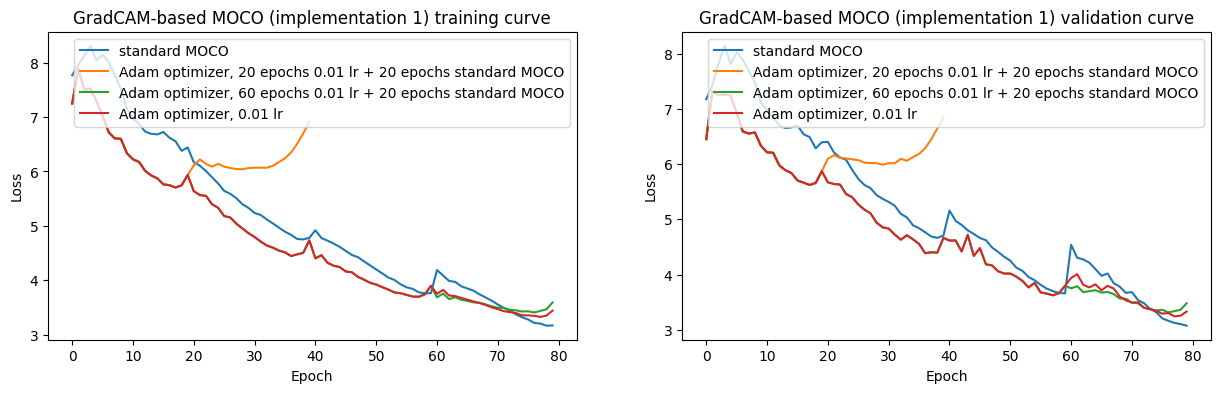

In [41]:
all_file_names = []
# all_file_names.append([
#    "./moco/76227_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75696_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
   "./moco/76305_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76227_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])


all_file_names.append([
    "./gradcam_perturb_moco/77436_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76304_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/77134_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76994_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
])

labels = [
    "standard MOCO",
    "Adam optimizer, 20 epochs 0.01 lr + 20 epochs standard MOCO",
    "Adam optimizer, 60 epochs 0.01 lr + 20 epochs standard MOCO",
    "Adam optimizer, 0.01 lr",

    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 1)", cut=80)



plotting cluster 0
early-stopFalse, min train loss: 2.7688000202178955, min val loss: 2.697200059890747
plotting cluster 1
77491, min train loss: 7.433700084686279, min val loss: 6.8927001953125
plotting cluster 2
78006, min train loss: 3.708699941635132, min val loss: 3.5750999450683594
plotting cluster 3
77745, min train loss: 6.0040998458862305, min val loss: 5.860300064086914


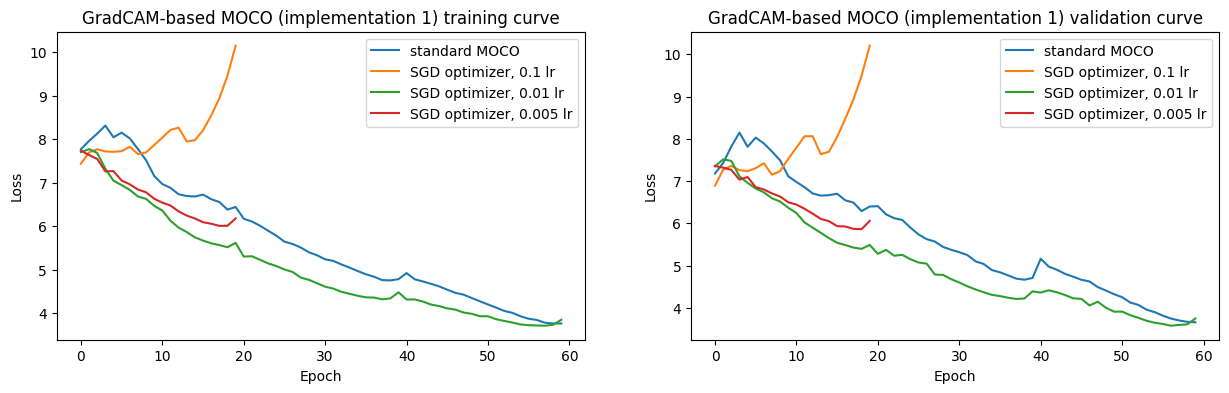

In [31]:
all_file_names = []
all_file_names.append([
   "./moco/76227_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75696_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])


all_file_names.append([
    "./gradcam_perturb_moco/77491_epochs20_early-stopFalse_neg-lossFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/77599_epochs20_early-stopFalse_neg-lossFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/77870_epochs20_early-stopFalse_neg-lossFalse_load77599_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/78006_epochs20_early-stopFalse_neg-lossFalse_load77870_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/77745_epochs20_early-stopFalse_neg-lossFalse_load_lr-pretrain0.005-0.005-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
])


labels = [
    "standard MOCO",
    # "Adam optimizer, 0.01 lr",

    "SGD optimizer, 0.1 lr",
    "SGD optimizer, 0.01 lr",
    "SGD optimizer, 0.005 lr",
    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 1)", cut=60)


plotting cluster 0
early-stopFalse, min train loss: 2.7688000202178955, min val loss: 2.697200059890747
plotting cluster 1
77418, min train loss: 4.823599815368652, min val loss: 4.7052001953125
plotting cluster 2
78748, min train loss: 3.2916998863220215, min val loss: 3.236599922180176
plotting cluster 3
77259, min train loss: 5.9542999267578125, min val loss: 5.861100196838379


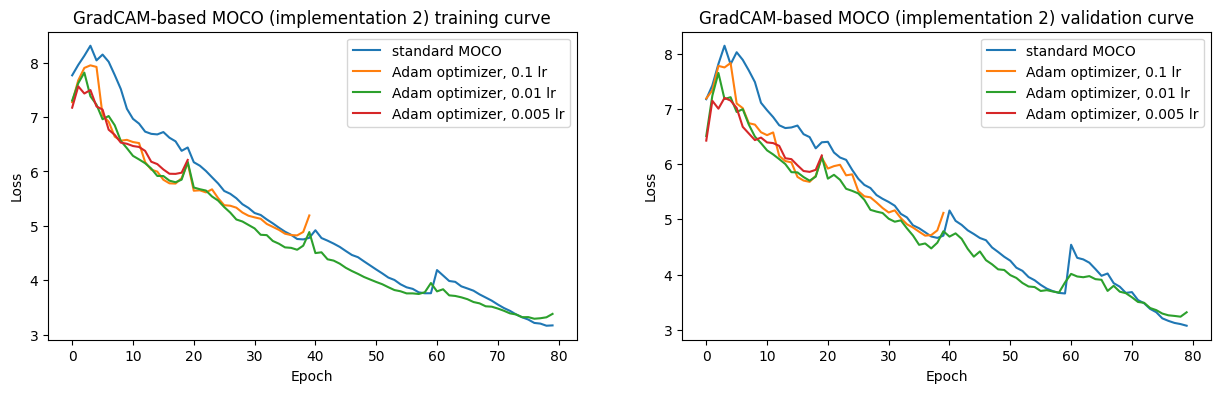

In [52]:
all_file_names = []
all_file_names.append([
   "./moco/76227_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load75696_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])


# all_file_names.append([
#     "./gradcam_perturb_moco/77333_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/77418_epochs20_early-stopFalse_neg-lossTrue_load77333_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/76695_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/77705_epochs20_early-stopFalse_neg-lossTrue_load76695_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/77872_epochs20_early-stopFalse_neg-lossTrue_load77705_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/78748_epochs20_early-stopFalse_neg-lossTrue_load77872_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/77259_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain0.005-0.005-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainAdam.txt"
])

labels = [
    "standard MOCO",
    # "80 adam 0.01 size 8 80 epoch",

    # "20 adam 0.1 size 8 neg loss",
    "Adam optimizer, 0.1 lr",
    
    # "20 adam 0.01 size 8 neg loss",
    # "40 adam 0.01 size 8 neg loss",
    "Adam optimizer, 0.01 lr",
    "Adam optimizer, 0.005 lr",
    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 2)", cut=80)


plotting cluster 0
early-stopFalse, min train loss: 2.358799934387207, min val loss: 2.4388999938964844
early-stopFalse, min train loss: 2.2936627864837646, min val loss: 2.335836887359619
plotting cluster 1
78938, min train loss: 2.9265999794006348, min val loss: 2.789099931716919
plotting cluster 2
79428, min train loss: 2.458333969116211, min val loss: 2.412899971008301
79428, min train loss: 2.4082250595092773, min val loss: 2.3617968559265137
plotting cluster 3
77884, min train loss: 5.976799964904785, min val loss: 5.832399845123291


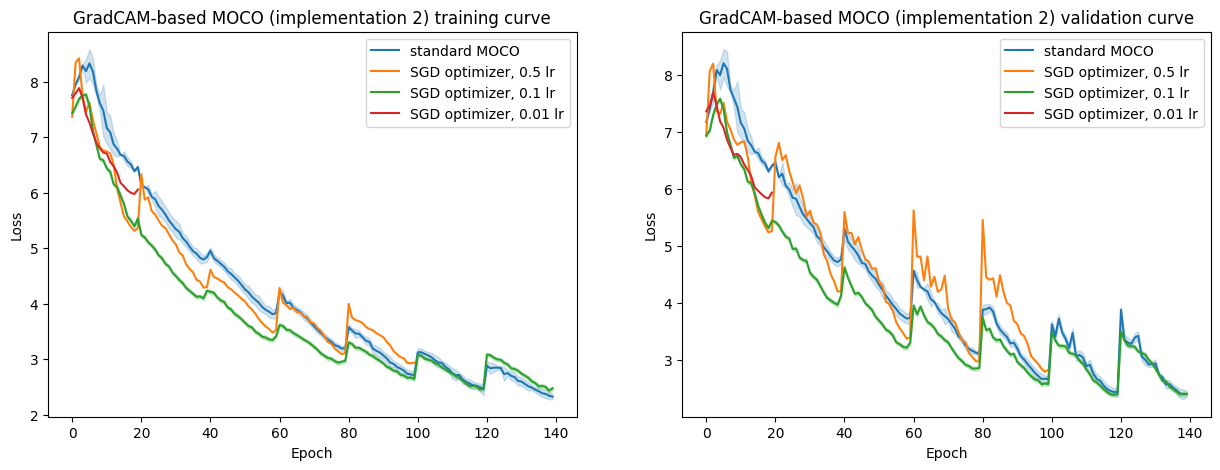

In [49]:
all_file_names = []
all_file_names.append([
   "./moco/76513_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
# all_file_names.append([
#     "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])

# all_file_names.append([
#     "./gradcam_perturb_moco/79045_epochs20_early-stopFalse_neg-lossTrue_load78621_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78234_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain1.0-1.0-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78150_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain0.5-0.5-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78230_epochs20_early-stopFalse_neg-lossTrue_load78150_lr-pretrain0.5-0.5-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78405_epochs20_early-stopFalse_neg-lossTrue_load78230_lr-pretrain0.5-0.5-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78474_epochs20_early-stopFalse_neg-lossTrue_load78405_lr-pretrain0.5-0.5-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/78938_epochs20_early-stopFalse_neg-lossTrue_load78474_lr-pretrain0.5-0.5-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/78057_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78290_epochs20_early-stopFalse_neg-lossTrue_load78057_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78440_epochs20_early-stopFalse_neg-lossTrue_load78290_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
# all_file_names.append([
#     "./gradcam_perturb_moco/78621_epochs20_early-stopFalse_neg-lossTrue_load78440_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/79428_epochs20_early-stopFalse_neg-lossTrue_load78703_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt",])

all_file_names.append([
    "./gradcam_perturb_moco/77884_epochs20_early-stopFalse_neg-lossTrue_load_lr-pretrain0.01-0.01-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt"
])

labels = [
    "standard MOCO",
    # "80 adam 0.01 size 8 80 epoch",

    # "SGD optimizer, 0.1 lr + 0.01 lr",
    # "SGD optimizer, 1.0 lr",
    # "20 sgd 0.5 size 8 neg loss",
    # "40 sgd 0.5 size 8 neg loss",
    # "60 sgd 0.5 size 8 neg loss",
    "SGD optimizer, 0.5 lr",
    # "20 sgd 0.1 size 8 neg loss",
    # "40 sgd 0.1 size 8 neg loss",
    # "60 sgd 0.1 size 8 neg loss",
    "SGD optimizer, 0.1 lr",
    "SGD optimizer, 0.01 lr",
    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 2)", cut=140)


plotting cluster 0
early-stopFalse, min train loss: 2.358799934387207, min val loss: 2.4388999938964844
early-stopFalse, min train loss: 2.2936627864837646, min val loss: 2.335836887359619
plotting cluster 1
79504, min train loss: 2.171799898147583, min val loss: 2.1238999366760254
plotting cluster 2
79559, min train loss: 2.331040859222412, min val loss: 2.301100015640259
plotting cluster 3
79428, min train loss: 2.458333969116211, min val loss: 2.412899971008301
79428, min train loss: 2.4082250595092773, min val loss: 2.3617968559265137


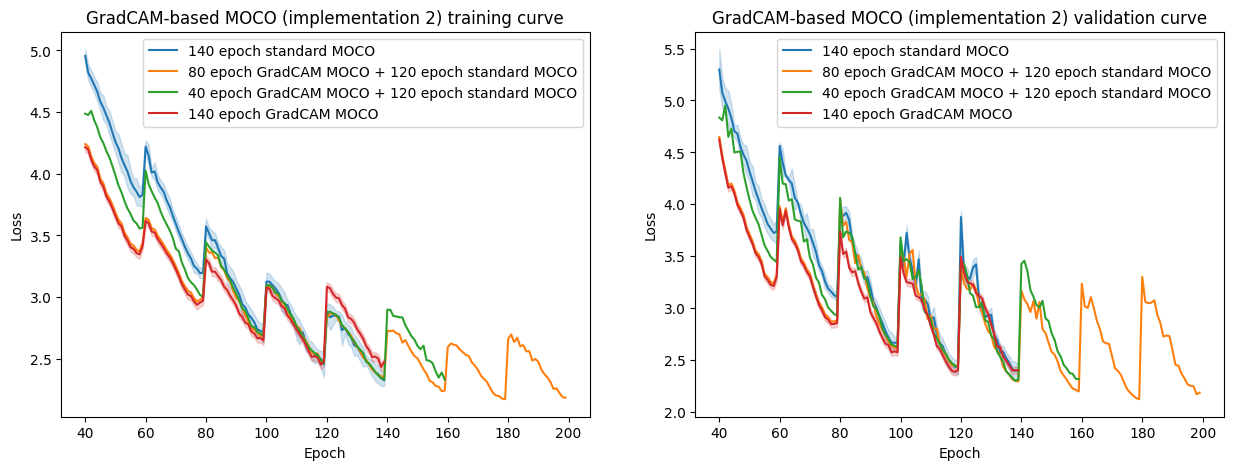

In [71]:
all_file_names = []
all_file_names.append([
   "./moco/76513_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76305_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt",
])
# all_file_names.append([
#     "./gradcam_perturb_moco/76849_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load76780_lr-pretrain0.01-0.01-linear-decay-12-16-head0.01_att-infomask-8-8_aug-colourTrue_optimizer-pretrainAdam-headAdam_remove-mlpTrue.txt"
# ])

all_file_names.append([
    "./gradcam_perturb_moco/79504_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load79429_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
all_file_names.append([
    "./gradcam_perturb_moco/79559_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load79456_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
])
# all_file_names.append([
#     "./gradcam_perturb_moco/79272_epochs20_early-stopFalse_supervisedFalse_shuffledFalse_load78057_lr-pretrain0.1-0.1-linear-decay-12-16-head0.01_aug-colourTrue_optimizer-pretrainSGD-headAdam_remove-mlpTrue.txt"
# ])
all_file_names.append([
    "./gradcam_perturb_moco/79428_epochs20_early-stopFalse_neg-lossTrue_load78703_lr-pretrain0.1-0.1-linear-decay-12-16_att-infomask-8-8_optimizer-pretrainSGD.txt",

])


labels = [
    "140 epoch standard MOCO",
    # "80 adam 0.01 size 8 80 epoch",
    "80 epoch GradCAM MOCO + 120 epoch standard MOCO",
    # "80 epoch GradCAM MOCO + standard MOCO",
    "40 epoch GradCAM MOCO + 120 epoch standard MOCO",
    # "20 epoch SGD optimizer 0.1 lr + standard moco",
    "140 epoch GradCAM MOCO",

    ]
fig, axarr = show_plot(all_file_names, labels, "GradCAM-based MOCO (implementation 2)", cut=1000, lowercut=40)


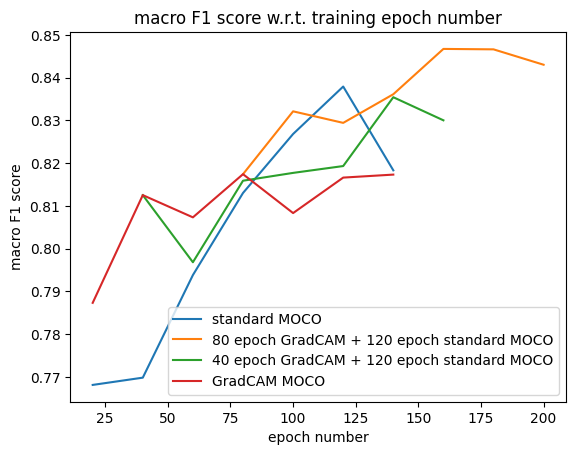

In [74]:
x = [20, 40, 60, 80, 100, 120, 140]
y = [0.7681, 0.7698, 0.7938, 0.8130, 0.8268, 0.8379, 0.8183]
plt.plot(x, y, label="standard MOCO")

x = [80, 100, 120, 140, 160, 180, 200]
y = [0.8174, 0.8321, 0.8294, 0.8361, 0.8467, 0.8466, 0.843]
plt.plot(x, y, label="80 epoch GradCAM + 120 epoch standard MOCO")

x = [40, 60, 80, 100, 120, 140, 160]
y = [0.8125, 0.7968, 0.81587, 0.8177, 0.8193, 0.8354, 0.83]
plt.plot(x, y, label="40 epoch GradCAM + 120 epoch standard MOCO")

x = [20, 40, 60, 80, 100, 120, 140]
y = [0.7873, 0.8125, 0.8073, 0.8174, 0.8083, 0.8166, 0.8173]
plt.plot(x, y, label="GradCAM MOCO")

plt.legend()
plt.title("macro F1 score w.r.t. training epoch number")
plt.xlabel("epoch number")
plt.ylabel("macro F1 score")
plt.legend()